In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/cleaned_profiles.csv').dropna(subset=['essay0'])

In [4]:
data = df['essay0']

In [5]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()),
                              tags=[str(i)]) for i, _d in enumerate(data)]

In [6]:
max_epochs = 50
vec_size = 50
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("dv_50.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
Model Saved


In [13]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d3v.model")
#to find the vector of a document which is not in training data
#test_data = word_tokenize("I love chatbots".lower())
#v1 = model.infer_vector(test_data)
#print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('0')
print(similar_doc)

[('13346', 0.8516662120819092), ('18683', 0.8462557196617126), ('7152', 0.839374303817749), ('861', 0.8218553066253662), ('8495', 0.8211197853088379), ('10043', 0.8207470178604126), ('6679', 0.8145020604133606), ('7144', 0.8139130473136902), ('409', 0.8138138055801392), ('13076', 0.8086997270584106)]


In [14]:
model.docvecs.vectors_docs.shape

(18830, 20)

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model.docvecs.vectors_docs
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

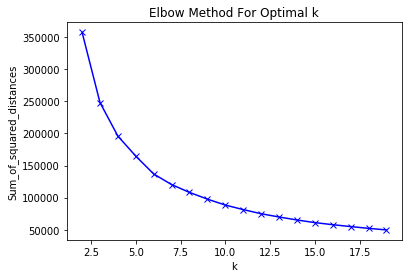

In [13]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
num_clusters = 4
num_seeds = 4
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404'
}
pca_num_components = 2
#texts_list = df['essay0']
# calculate tf-idf of texts
#tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True,
                                    #smooth_idf=True, ngram_range=(2, 3))
#tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

X = model.docvecs.vectors_docs
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
labels = clustering_model.fit_predict(reduced_data)

In [ ]:
df[df['clust_label']==1]['essay0']

No handles with labels found to put in legend.


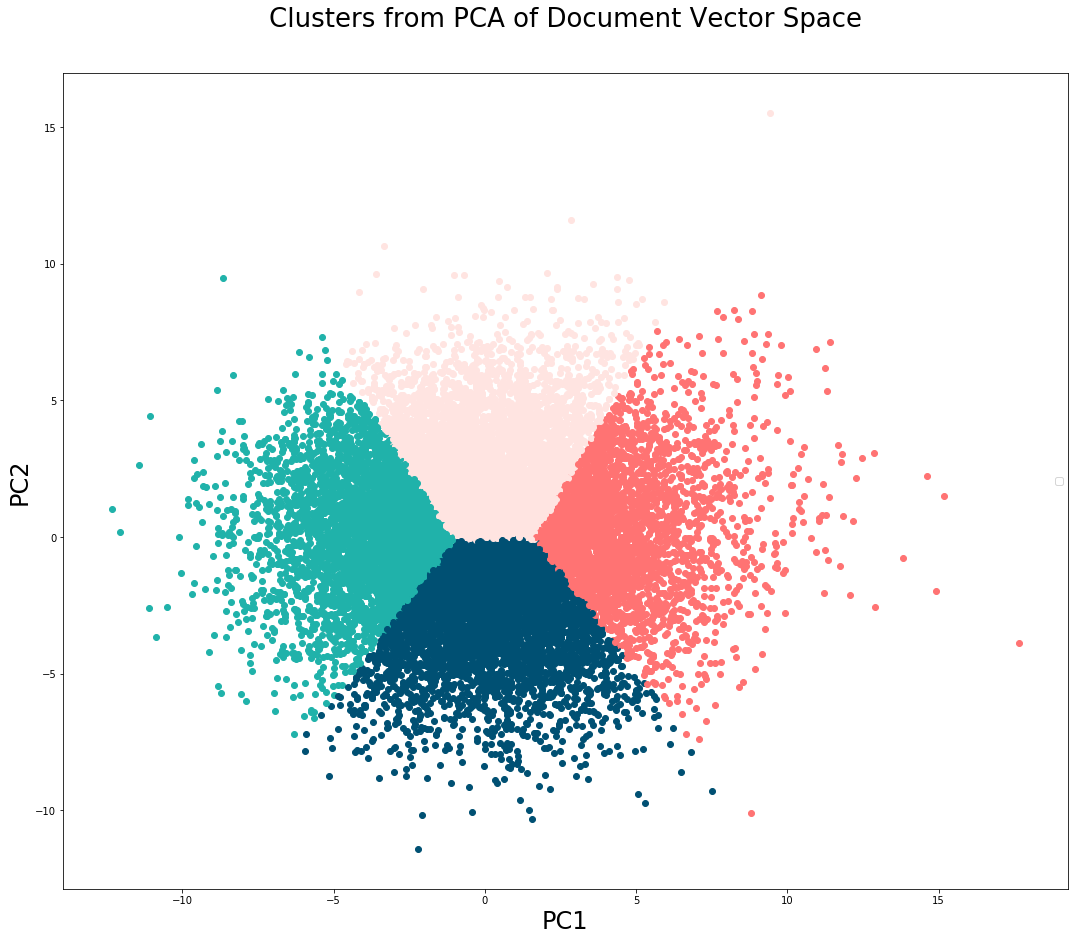

In [17]:
fig, ax = plt.subplots(figsize=(18, 15))
ttl = ax.title
ttl.set_position([.5, 1.05])
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.title('Clusters from PCA of Document Vector Space', loc='center', fontsize=26)
plt.xlabel('PC1', fontsize=24)
plt.ylabel('PC2',fontsize=24)
plt.legend(loc='center right')
plt.savefig('5_clusters.png', bbox_inches='tight')

In [19]:
from sklearn.manifold import TSNE
# Creating and fitting the tsne model to the document embeddings
tsne_model = TSNE(early_exaggeration=4,
                  n_components=2,
                  verbose=1,
                  random_state=2018,
                  n_iter=300)
tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21812 samples in 0.943s...
[t-SNE] Computed neighbors for 21812 samples in 28.705s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21812
[t-SNE] Computed conditional probabilities for sample 2000 / 21812
[t-SNE] Computed conditional probabilities for sample 3000 / 21812
[t-SNE] Computed conditional probabilities for sample 4000 / 21812
[t-SNE] Computed conditional probabilities for sample 5000 / 21812
[t-SNE] Computed conditional probabilities for sample 6000 / 21812
[t-SNE] Computed conditional probabilities for sample 7000 / 21812
[t-SNE] Computed conditional probabilities for sample 8000 / 21812
[t-SNE] Computed conditional probabilities for sample 9000 / 21812
[t-SNE] Computed conditional probabilities for sample 10000 / 21812
[t-SNE] Computed conditional probabilities for sample 11000 / 21812
[t-SNE] Computed conditional probabilities for sample 12000 / 21812
[t-SNE] Computed conditional probabilities for sa

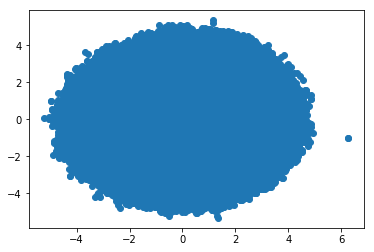

In [22]:
plt.scatter(tsne_d2v [:, 0], tsne_d2v [:, 1])
plt.show()


In [3]:
model.docvecs.vectors_docs

array([[ 1.0502077 ,  1.5790759 ,  2.031688  , ...,  1.6837116 ,
        -1.9200097 ,  1.2473881 ],
       [-0.35760814,  1.1969206 , -0.27568325, ..., -3.7188568 ,
        -2.8023038 ,  1.9305866 ],
       [-0.3864266 ,  1.8624496 , -1.5658809 , ...,  2.9540095 ,
        -1.3203001 ,  0.39238647],
       ...,
       [-2.615777  , -2.9369195 , -2.8828428 , ...,  0.93387026,
         0.6083248 ,  2.912551  ],
       [ 1.786991  , -1.2000811 ,  3.411575  , ...,  3.0875742 ,
        -2.5243855 ,  2.3984208 ],
       [ 0.59494764,  3.2955294 , -1.6439687 , ...,  1.1075243 ,
        -4.1091585 , -1.4930052 ]], dtype=float32)

[2 8 5 ... 6 2 3]


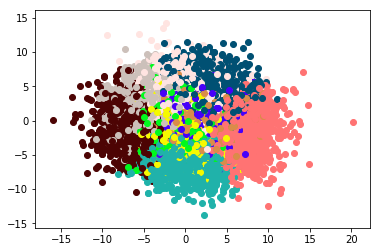

In [25]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
texts_list = df['essay0']

# calculate tf-idf of texts
#tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True,
                                    #smooth_idf=True, ngram_range=(2, 3))
#tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

X = model.docvecs.vectors_docs

labels = clustering_model.fit_predict(X)
print(labels)
# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



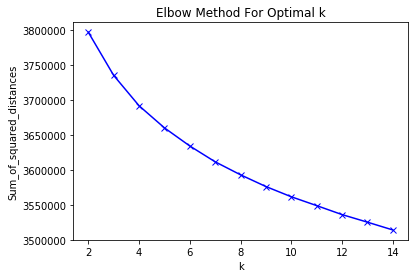

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
reduced_data = PCA(n_components=2).fit_transform(X)


In [16]:
from sklearn.metrics import silhouette_score
ssd = []
silh_dict={}
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(reduced_data)
    label = km.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    #silh_dict[K] = sil_coeff
    ssd.append(km.inertia_)  

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [19]:
silh_dict

{range(2, 20): 0.0044898293}

In [ ]:

    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [47]:
#Based on findigs, we will take 5 clusters. 
# See what comes
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 5
num_seeds = 5
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404'
}
pca_num_components = 2
#texts_list = df['essay0']
# calculate tf-idf of texts
#tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True,
                                    #smooth_idf=True, ngram_range=(2, 3))
#tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

X = model.docvecs.vectors_docs
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
labels = clustering_model.fit_predict(reduced_data)
print(labels)
# ----------------------------------------------------------------------------------------------------------------------



[0 4 0 ... 0 4 4]


In [50]:
df['clust_label'] = pd.Series(labels)


In [59]:
df[df['clust_label']==1]['essay0']

5        i just moved to the bay area from austin, tx (...
10       bay area transplant six years or so now, strai...
18       originally from france, lived in 3 different c...
31       my names josh, and i create art for a living. ...
37       hi, im sean, so these sites are always a wired...
54       i'm a really simple person. i have an anaytica...
56       i'm a pretty laid back guy, currently work ful...
57       you might be wondering why my profile name is ...
60       just a laid back guy hoping to meet some reall...
61       tom is tall. tom is funny. tom is creative and...
65       socially awkward but if you give me a few drin...
76       i am a little tea pot, not short, nor stout! i...
78       i guess this is where i'm suppose to tell you ...
82       hi, my name is tim. welcome to my profile.i gr...
85       i'm just this guy, you know? i don't take myse...
86       hey. i'm trying to make the most of this life ...
90       living in the city, im really busy all the tim.

In [56]:
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404'
}

In [53]:
pd.crosstab(df.clust_label, df.edu).apply(lambda r: r/r.sum(), axis=0)

edu,High School or less,More than High School,unknown
clust_label,,,
0.0,0.183147,0.174115,0.174384
1.0,0.253420,0.191268,0.225123
2.0,0.121891,0.163734,0.133990
3.0,0.173507,0.180888,0.166995
4.0,0.268035,0.289995,0.299507


<Figure size 432x288 with 0 Axes>

In [41]:
X.shape

(21812, 20)

In [ ]:
def get_cluster():
    

In [32]:
plt.savefig('5_clusters.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
num_clusters = 4
num_seeds = 4
max_iterations = 300
labels_color_map = {
    0: #FF0000, 1: '#800000', 2: ' #33fffc', 3: '#3339ff', 4: ' #FF5733'
}
pca_num_components = 2
#texts_list = df['essay0']
# calculate tf-idf of texts
#tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True,
                                    #smooth_idf=True, ngram_range=(2, 3))
#tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

X = model.docvecs.vectors_docs
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
labels = clustering_model.fit_predict(reduced_data)
print(labels)
# ----------------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [26]:
df['doc_vector'] = X

NameError: name 'df' is not defined

In [23]:
km.labels_

array([18, 10,  1, ...,  8,  0, 18])

In [28]:
X.shape

(21812, 20)

In [27]:
a = [km.predict(point) for point in X]

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.0502077   1.5790759   2.031688    0.19651951 -2.3232493  -4.128509
 -5.279844   -3.8416502  -1.9233027  -0.01039484  3.3199003   2.6535635
 -1.6335508   3.2677386   6.01901     0.4596721   1.4396015   1.6837116
 -1.9200097   1.2473881 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X = model.docvecs.vectors_docs
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
labels = clustering_model.fit_predict(reduced_data)
print(labels)
# ----------------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots()
X = model[model.wv.vocab]

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [18]:
### Implement all 4 models##
from gensim.models import LdaModel, LsiModel, HdpModel 
#What do all these models need? 
